Provide a Binder link for running your project. [https://mybinder.org/][binder]

Dataset and Motivation
Explain how and why the dataset was collected.
Describe the metadata of your dataset, including the source, structure, and fields.

Actual Task Definition/Research Question
Define the real-world problem you are trying to solve.
Clearly specify the input and output of your analysis.

Literature Review
Summarize existing work in the area of your project.
Highlight how your work is novel or different from previous research.

Quality of Cleaning
Describe your data cleaning and type conversion activities.
Share any unusual challenges or issues faced during data cleaning.
Explain your approach to handling missing values and provide the reasoning.
Present data summary statistics and interpretations of key findings.

Visualization
Create various data visualizations such as box plots, bar plots, violin plots, and pair plots to explore relationships and data distributions.
Provide descriptions and insights gained from each visualization.
Explain how data visualizations help in understanding data distribution.
Address the handling of possible outliers as per data distribution visualizations, either confirming their status or adding a disclosure statement if removed.
Remember to organize your Jupyter Notebook with markdown cells for documentation and code cells for analysis. Each section should address the points mentioned in the rubric. Make your report coherent and engaging, as it might be shared as a blog or scientific study. Properly document your code and provide clear explanations for the reader.

Tried to use wikipedia module. but the info given back doesn't have what I need.

In [1]:
import wikipedia as wiki

wiki.search('best video games')

['List of video games considered the best',
 'List of best-selling video games',
 'List of Game of the Year awards',
 '1997 in video games',
 'List of best-selling GameCube video games',
 'Lists of best-selling video games by platform',
 '1996 in video games',
 '2000 in video games',
 '2004 in video games',
 '2008 in video games']

In [2]:
best_selling = wiki.page('List of best-selling video games')

In [3]:
best_selling.url

'https://en.wikipedia.org/wiki/List_of_best-selling_video_games'

In [4]:
best_selling.categories

['Articles with short description',
 'Dynamic lists',
 'Lists of best-selling video games',
 'Short description is different from Wikidata',
 'Use mdy dates from November 2020',
 'Wikipedia indefinitely move-protected pages',
 'Wikipedia indefinitely semi-protected pages']

In [5]:
best_selling.content

"This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is Minecraft, a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, selling more than 300 million copies across all platforms. Grand Theft Auto V and EA's Tetris are the only other known video games to have sold over 100 million copies. The best-selling game on a single platform is Wii Sports, with nearly 83 million sales for the Wii console. In 2023, Minecraft became the first video game to surpass 300 million copies sold worldwide.Among the top 50 best-selling video games on this list, over half were developed or published by Nintendo, including four of the top ten; four Nintendo titles were published with their affiliate, The Pokémon Company. Other publishers with multiple entries in the top 50 include Rockstar Games with five games, Activision with four games, Blizzard Entertainment, Electronic Arts and Namco

Tried the wikipediaapi mod, which resulted with greater feedback still no easy access to data without web scraping.

In [6]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia('info (zhiwt01@gmail.com.com)', 'en')

page_py = wiki_wiki.page('List_of_best-selling_video_games')
print("Page - Exists: %s" % page_py.exists())

Page - Exists: True


In [7]:
def print_categories(page):
        categories = page.categories
        for title in sorted(categories.keys()):
            print("%s: %s" % (title, categories[title]))


print("Categories")
print_categories(page_py)

Categories
Category:Articles with short description: Category:Articles with short description (id: ??, ns: 14)
Category:Dynamic lists: Category:Dynamic lists (id: ??, ns: 14)
Category:Lists of best-selling video games: Category:Lists of best-selling video games (id: ??, ns: 14)
Category:Short description is different from Wikidata: Category:Short description is different from Wikidata (id: ??, ns: 14)
Category:Use mdy dates from November 2020: Category:Use mdy dates from November 2020 (id: ??, ns: 14)
Category:Wikipedia indefinitely move-protected pages: Category:Wikipedia indefinitely move-protected pages (id: ??, ns: 14)
Category:Wikipedia indefinitely semi-protected pages: Category:Wikipedia indefinitely semi-protected pages (id: ??, ns: 14)


In [8]:
page_py.text

"This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is Minecraft, a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, selling more than 300 million copies across all platforms. Grand Theft Auto V and EA's Tetris are the only other known video games to have sold over 100 million copies. The best-selling game on a single platform is Wii Sports, with nearly 83 million sales for the Wii console. In 2023, Minecraft became the first video game to surpass 300 million copies sold worldwide.Among the top 50 best-selling video games on this list, over half were developed or published by Nintendo, including four of the top ten; four Nintendo titles were published with their affiliate, The Pokémon Company. Other publishers with multiple entries in the top 50 include Rockstar Games with five games, Activision with four games, Blizzard Entertainment, Electronic Arts and Namco

In [9]:
wiki_text = wikipediaapi.Wikipedia(
    'info (zhiwt01@gmail.com.com)', 'en', extract_format=wikipediaapi.ExtractFormat.WIKI)
text = wiki_text.page('List_of_best-selling_video_games')
text.text

"This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is Minecraft, a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, selling more than 300 million copies across all platforms. Grand Theft Auto V and EA's Tetris are the only other known video games to have sold over 100 million copies. The best-selling game on a single platform is Wii Sports, with nearly 83 million sales for the Wii console. In 2023, Minecraft became the first video game to surpass 300 million copies sold worldwide.Among the top 50 best-selling video games on this list, over half were developed or published by Nintendo, including four of the top ten; four Nintendo titles were published with their affiliate, The Pokémon Company. Other publishers with multiple entries in the top 50 include Rockstar Games with five games, Activision with four games, Blizzard Entertainment, Electronic Arts and Namco

In [10]:
wiki_html = wikipediaapi.Wikipedia(
    'info (zhiwt01@gmail.com.com)', 'en', extract_format=wikipediaapi.ExtractFormat.HTML)
html = wiki_html.page('List_of_best-selling_video_games')
html.text


'<p class="mw-empty-elt">\n\n\n</p>\n\n<p>This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is <i>Minecraft</i>, a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, selling more than 300\xa0million copies across all platforms. <i>Grand Theft Auto V</i> and EA\'s <i>Tetris</i> are the only other known video games to have sold over 100\xa0million copies. The best-selling game on a single platform is <i>Wii Sports</i>, with nearly 83\xa0million sales for the Wii console. In 2023, Minecraft became the first video game to surpass 300 million copies sold worldwide.</p><p>Among the top 50 best-selling video games on this list, over half were developed or published by Nintendo, including four of the top ten; four Nintendo titles were published with their affiliate, The Pokémon Company. Other publishers with multiple entries in the top 50 include Rockstar Games with fiv

In [11]:
from bs4 import BeautifulSoup as bs

soup = bs(html.text, 'html.parser')

print(soup.prettify())

<p class="mw-empty-elt">
</p>
<p>
 This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is
 <i>
  Minecraft
 </i>
 , a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, selling more than 300 million copies across all platforms.
 <i>
  Grand Theft Auto V
 </i>
 and EA's
 <i>
  Tetris
 </i>
 are the only other known video games to have sold over 100 million copies. The best-selling game on a single platform is
 <i>
  Wii Sports
 </i>
 , with nearly 83 million sales for the Wii console. In 2023, Minecraft became the first video game to surpass 300 million copies sold worldwide.
</p>
<p>
 Among the top 50 best-selling video games on this list, over half were developed or published by Nintendo, including four of the top ten; four Nintendo titles were published with their affiliate, The Pokémon Company. Other publishers with multiple entries in the top 50 include Rockst

In [12]:
import pandas as pd
my_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_video_games') 

for x in my_table:
    print(x.head())

                                                   0
0                                        Video games
1  Platforms Arcade video game Console game Game ...
2  Genres Action Beat 'em up Hack and slash Fight...
3  Lists Arcade games highest-grossing Best-selli...
4  Development Game AI Game design Video game des...
                 Title      Sales            Series     Platform(s)  \
0            Minecraft  300000000         Minecraft  Multi-platform   
1   Grand Theft Auto V  185000000  Grand Theft Auto  Multi-platform   
2          Tetris (EA)  100000000            Tetris  Multi-platform   
3           Wii Sports   82900000               Wii             Wii   
4  PUBG: Battlegrounds   75000000     PUBG Universe  Multi-platform   

   Initial release date   Developer(s)[b]  Publisher(s)[b] Ref.  
0  November 18, 2011[c]    Mojang Studios   Mojang Studios  [4]  
1    September 17, 2013    Rockstar North   Rockstar Games  [5]  
2    September 12, 2006         EA Mobile  Electronic Art

Through research was able to load table data into pandas

In [13]:
import matplotlib.pyplot as plt

titles = my_table[1].convert_dtypes()

titles.head()

,Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b],Ref.
0,Minecraft,300000000,Minecraft,Multi-platform,"November 18, 2011[c]",Mojang Studios,Mojang Studios,[4]
1,Grand Theft Auto V,185000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games,[5]
2,Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts,[6]
3,Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo,[7]
4,PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,Krafton,[8]


Data check, NAN check, replace NAN with '0', 

In [14]:
titles.dtypes

Title                   string[python]
Sales                            Int64
Series                  string[python]
Platform(s)             string[python]
Initial release date    string[python]
Developer(s)[b]         string[python]
Publisher(s)[b]         string[python]
Ref.                    string[python]
dtype: object

In [15]:
titles.isna().sum()

Title                   0
Sales                   0
Series                  5
Platform(s)             0
Initial release date    0
Developer(s)[b]         0
Publisher(s)[b]         0
Ref.                    0
dtype: int64

In [16]:
rows_with_nan = titles[titles.isna().any(axis=1)]
rows_with_nan

,Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b],Ref.
12,Terraria,44500000,<NA>,Multi-platform,"May 16, 2011",Re-Logic,Re-Logic / 505 Games,[21]
16,Human: Fall Flat,40000000,<NA>,Multi-platform,"July 22, 2016",No Brakes Games,Curve Digital,[32]
26,Duck Hunt,28300000,<NA>,NES,"April 21, 1984",Nintendo R&D1,Nintendo,[38]
44,Kinect Adventures!,24000000,<NA>,Xbox 360,"November 4, 2010",Good Science Studio,Xbox Game Studios,[53]
45,Nintendogs,23960000,<NA>,Nintendo DS,"April 21, 2005",Nintendo EAD,Nintendo,[34]


In [17]:
titles = titles.fillna('0')
titles.isna().sum()

Title                   0
Sales                   0
Series                  0
Platform(s)             0
Initial release date    0
Developer(s)[b]         0
Publisher(s)[b]         0
Ref.                    0
dtype: int64

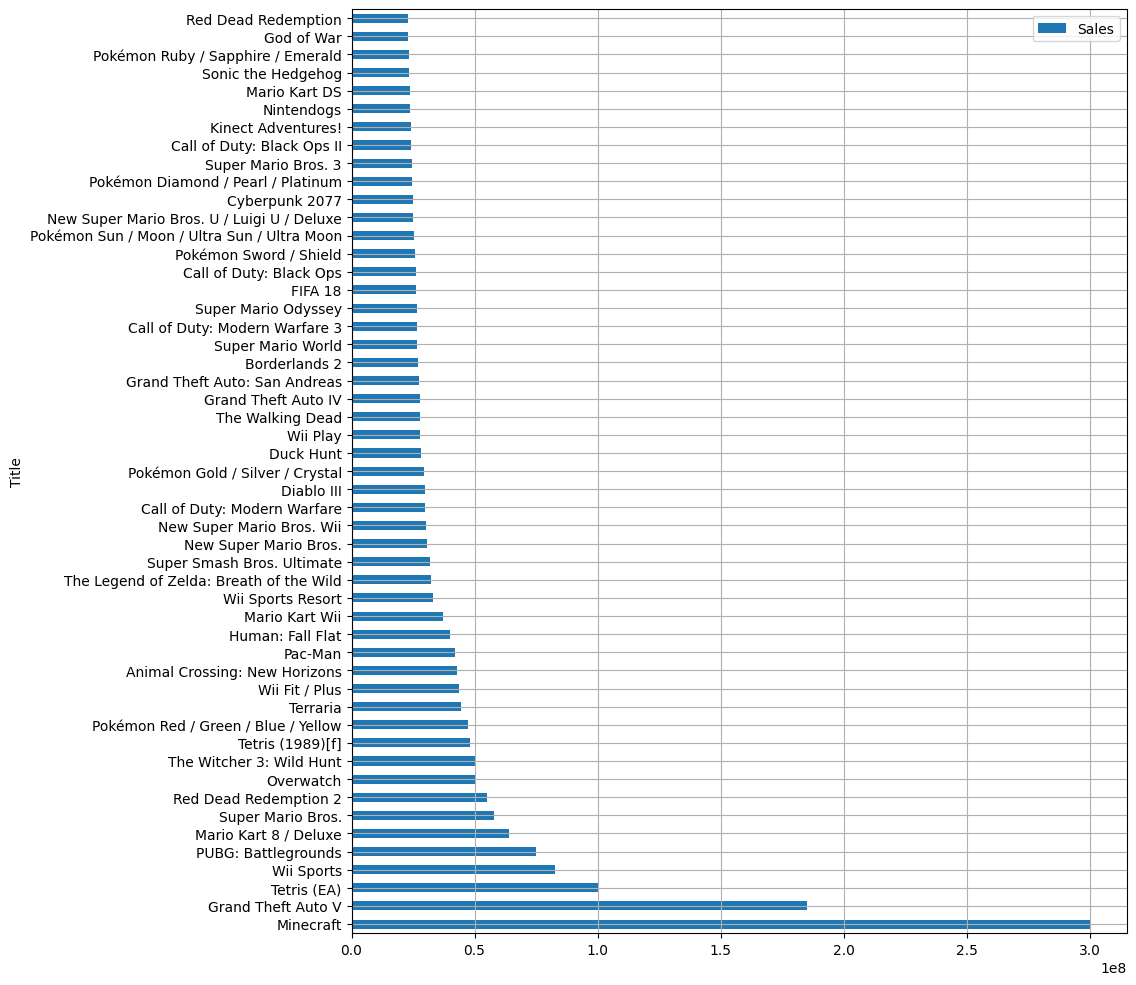

In [18]:
df = titles
ax = titles.plot(x='Title',y='Sales', 
         kind="barh", grid=True,  figsize=(10,12))

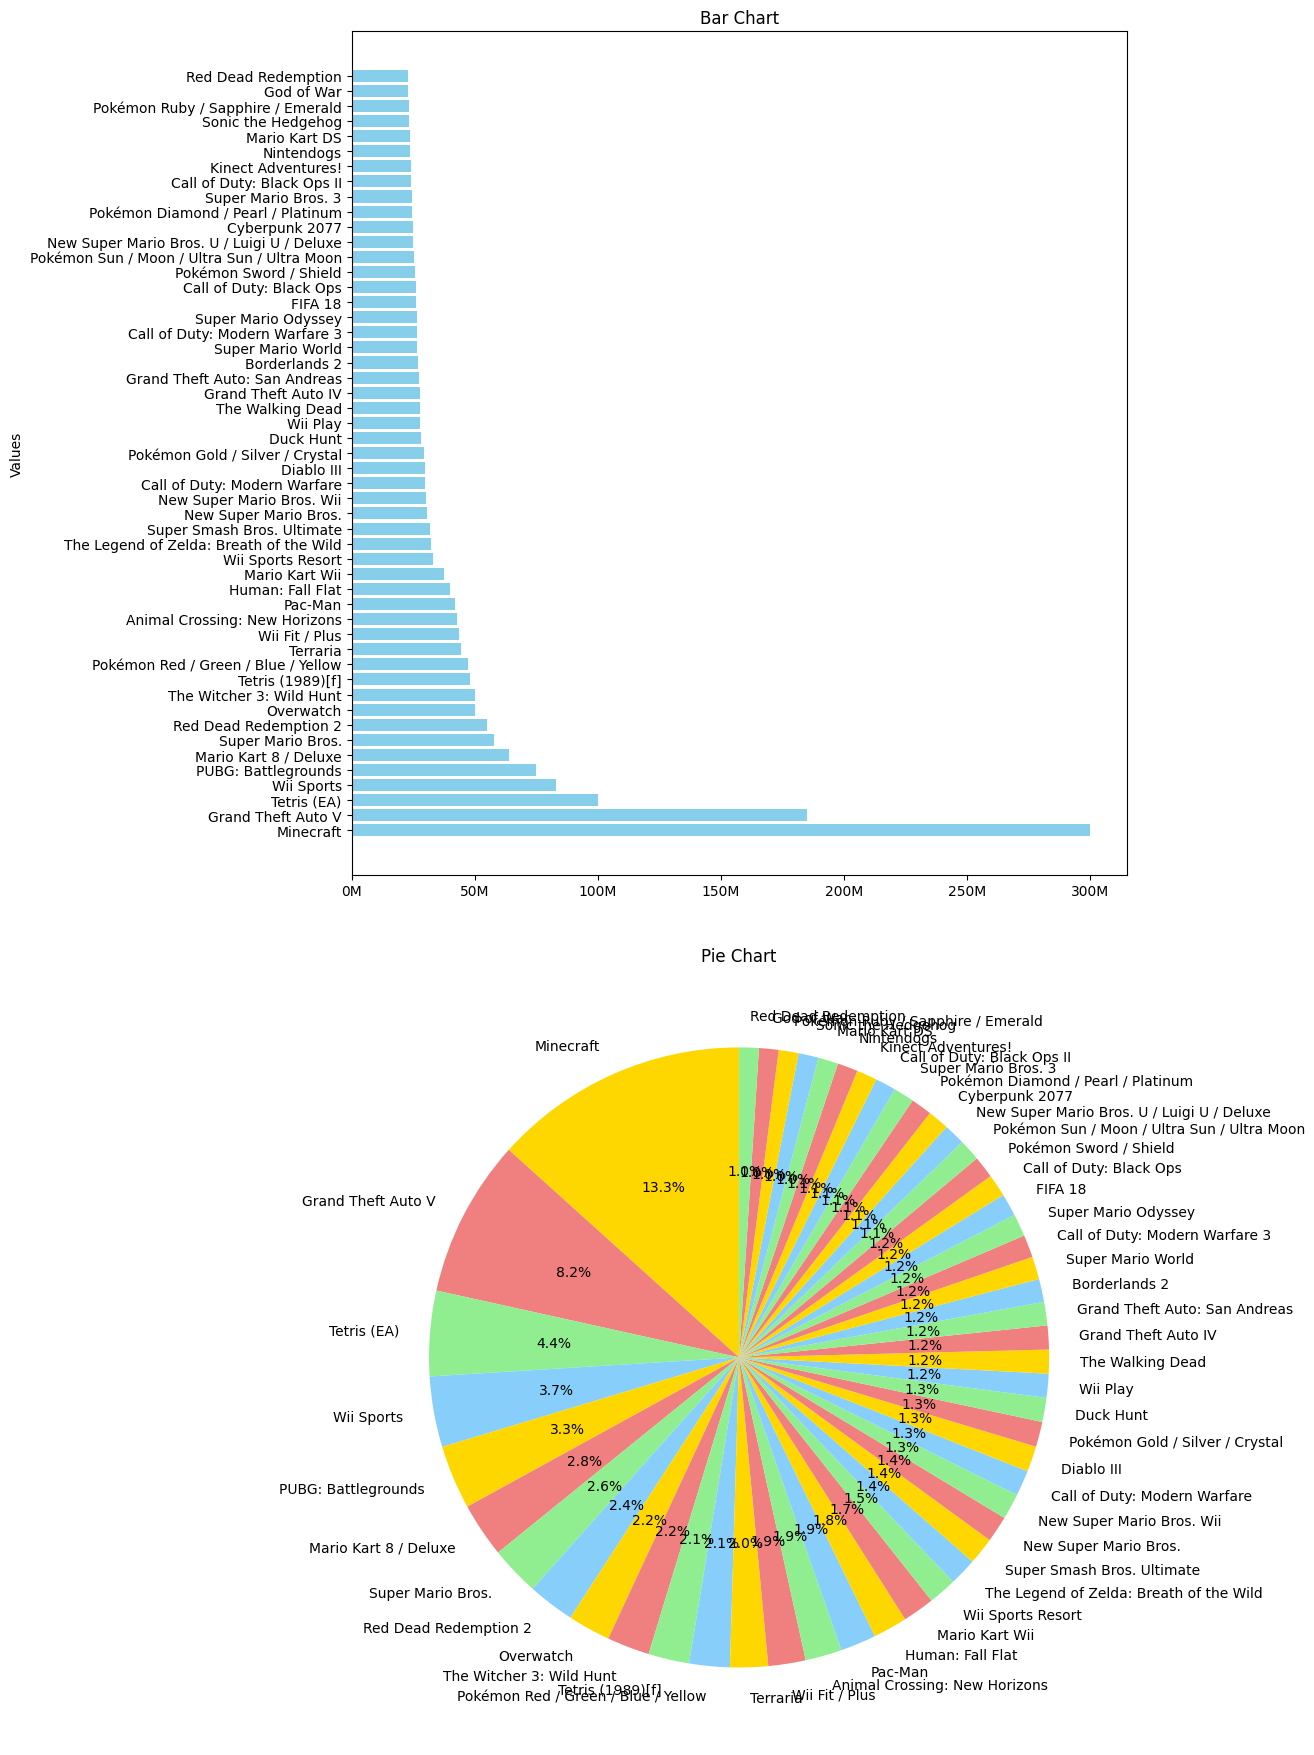

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))

ax1.barh(titles['Title'], titles['Sales'], color='skyblue')
ax1.set_ylabel('Values')
ax1.set_title('Bar Chart')
ax1.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax2.pie(titles['Sales'], labels=titles['Title'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'])
ax2.set_title('Pie Chart')

plt.tight_layout()

plt.show()

Showing all games that sold more then 50 million to compare against all other sales totaled.

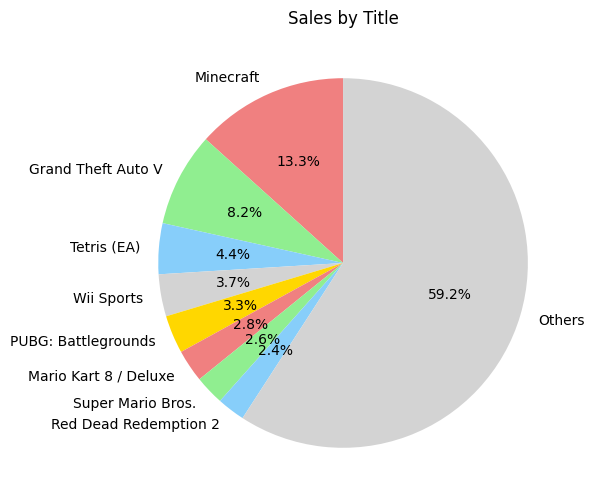

In [20]:
threshold = 50000000

titles_above_threshold = titles[titles['Sales'] > threshold]
titles_others = titles[titles['Sales'] <= threshold]
sales_others_total = titles_others['Sales'].sum()

titles_others = pd.DataFrame({'Title': ['Others'], 'Sales': [sales_others_total]})

combined_titles = pd.concat([titles_above_threshold, titles_others])

plt.figure(figsize=(6, 6))
plt.pie(combined_titles['Sales'], labels= combined_titles['Title'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue', 'lightgray', 'gold'])
plt.title('Sales by Title')

plt.show()

Request data from https://www.igdb.com/ using their api https://api-docs.igdb.com/
generated access with twitch account. Used their python api wrapper.

In [2]:
from config import headers
from igdb.wrapper import IGDBWrapper

id, key = headers.values()
wrapper = IGDBWrapper(client_id=id, auth_token=key)

In [3]:
byte_array = wrapper.api_request(
    endpoint='games',
    query='fields id, age_ratings, alternative_names, category, game_modes, genres, involved_companies, multiplayer_modes, name, platforms, player_perspectives, slug, summary, themes, url, game_localizations; where name ="Minecraft";')

print(byte_array)

b'[\n  {\n    "id": 135400,\n    "age_ratings": [\n      33580,\n      47376,\n      47377,\n      47378,\n      47379,\n      47380,\n      47381\n    ],\n    "alternative_names": [\n      141089\n    ],\n    "category": 11,\n    "game_modes": [\n      1,\n      2,\n      3,\n      4,\n      5\n    ],\n    "genres": [\n      13,\n      31\n    ],\n    "involved_companies": [\n      189609\n    ],\n    "multiplayer_modes": [\n      11131,\n      11132,\n      11133,\n      11134,\n      11135,\n      11136\n    ],\n    "name": "Minecraft",\n    "platforms": [\n      6,\n      34,\n      39,\n      48,\n      49,\n      130,\n      132\n    ],\n    "player_perspectives": [\n      1,\n      2,\n      7\n    ],\n    "slug": "minecraft--1",\n    "summary": "Minecraft focuses on allowing the player to explore, interact with, and modify a dynamically-generated map made of one-cubic-meter-sized blocks. In addition to blocks, the environment features plants, mobs, and items. Some activities in

In [3]:
type(byte_array)

bytes

In [4]:
import igdbapi_pb2 as ig
ig.
games_message = GameResult()
games_message.ParseFromString(byte_array)

DecodeError: Error parsing message

In [ ]:
import requests
import time

titles_lst = titles['Title'].tolist()
cleaned_titles = [title.replace('/','(').split(' (')[0] for title in titles_lst]
print(cleaned_titles)



In [ ]:
responses = []

requests_per_second = 4
max_open_requests = 8

In [ ]:
v ={
    "id": 121,
    "age_ratings": [
      31660,
      46780,
      47365,
      47366,
      47368,
      47370,
      109464
    ],
    "alternative_names": [
      30487,
      51648,
      53531,
      100969,
      123546
    ],
    "category": 0,
    "game_modes": [
      1,
      2,
      3,
      4,
      5
    ],
    "genres": [
      13,
      31
    ],
    "involved_companies": [
      102771
    ],
    "multiplayer_modes": [
      11137,
      11138,
      11139
    ],
    "name": "Minecraft",
    "platforms": [
      3,
      6,
      14
    ],
    "player_perspectives": [
      1,
      2,
      7
    ],
    "slug": "minecraft",
    "summary": "Minecraft focuses on allowing the player to explore, interact with, and modify a dynamically-generated map made of one-cubic-meter-sized blocks. In addition to blocks, the environment features plants, mobs, and items. Some activities in the game include mining for ore, fighting hostile mobs, and crafting new blocks and tools by gathering various resources found in the game. The game\u0027s open-ended model allows players to create structures, creations, and artwork on various multiplayer servers or their single-player maps. Other features include redstone circuits for logic computations and remote actions, minecarts and tracks, and a mysterious underworld called the Nether. A designated but completely optional goal of the game is to travel to a dimension called the End, and defeat the ender dragon.",
    "themes": [
      17,
      21,
      33,
      35,
      38
    ],
    "url": "https://www.igdb.com/games/minecraft",
    "game_localizations": [
      1535,
      1590
    ]
  }
print(v.keys())

In [ ]:
payload = 'fields id, age_ratings, alternative_names, category, game_modes, genres, involved_companies, multiplayer_modes, name, platforms, player_perspectives, slug, summary, themes, url, game_localizations; where name ="Minecraft";'
id, key = headers.values()

In [ ]:
import requests


In [ ]:
for title in cleaned_titles:
    payload = f'''fields 'id', 'age_ratings', 'alternative_names', 'category', 'game_modes', 'genres', 'involved_companies', 'multiplayer_modes', 'name', 'platforms', 'player_perspectives', 'slug', 'summary', 'themes', 'url', 'game_localizations'; where name="{title}"; sort rating desc;'''
    response = requests.post(url, headers=key.headers, data=payload)
    
    if response.status_code == 429:
        # If rate limited, wait and retry
        time.sleep(1)
        response = requests.post(url, headers=key.headers, data=payload)

    responses.append(response.text)
    print(response.text)
    time.sleep(1 / requests_per_second)

    while len(responses) >= max_open_requests:
        time.sleep(0.1)
        responses = [res for res in responses if not res.startswith('{"status":429')]  # Remove completed requests
